In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

In [2]:
import seaborn
seaborn.set()

In [3]:
births = pd.read_csv('../data/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [4]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

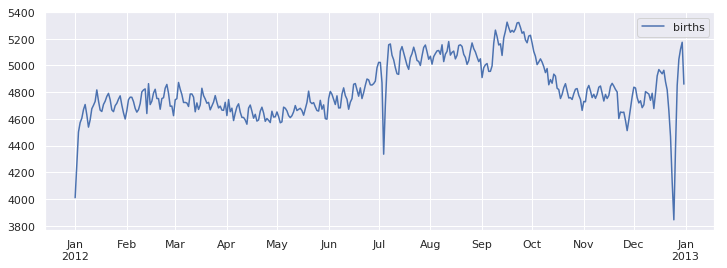

In [5]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

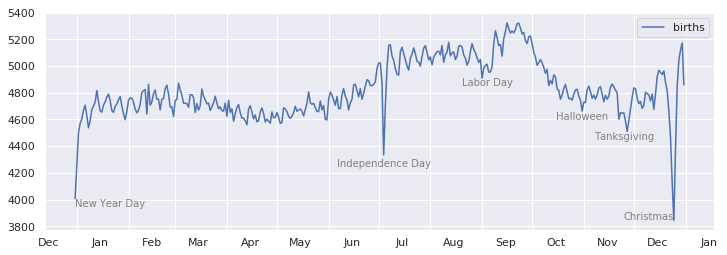

In [11]:
fig, ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)

style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, 'New Year Day', **style)
ax.text('2012-7-4', 4250, 'Independence Day', ha='center', **style)
ax.text('2012-9-4', 4850, 'Labor Day', ha='center', **style)
ax.text('2012-10-31', 4600, 'Halloween', ha='center', **style)
ax.text('2012-11-25', 4450, 'Tanksgiving', ha='center', **style)
ax.text('2012-12-25', 3850, 'Christmas', ha='right', **style)

ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))